# LAB 1
Analyze the effect of different windowing techniques on processing of data streams.

In [2]:
# Required Imports
!pip install numpy pandas matplotlib seaborn scikit-learn

^C


Defaulting to user installation because normal site-packages is not writeable
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd

# Update file path as per your system
# Skip first 4 metadata
dataset_path = "./AReMdataset/walking/dataset1.csv"
df = pd.read_csv(dataset_path, skiprows=4)
print("Walking-Dataset loaded successfully.")

print(df.head())

Walking-Dataset loaded successfully.
   # Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                0      35.00       3.67      16.50       3.77      14.00   
1              250      28.50       3.35      17.50       3.77      12.25   
2              500      35.50       2.87      15.75       2.86      17.75   
3              750      29.75      12.19      16.25       2.17      20.75   
4             1000      27.00       2.12      16.75       0.83      24.75   

   var_rss23  
0       1.63  
1       3.90  
2       5.07  
3       2.59  
4       1.64  


## Smulating Data Streams

In [6]:
# Simulating data streams
import time

# Function to simulate streaming data
def simulate_streaming_data(data, delay=0.5):
    """
    Simulates streaming data by yielding one row at a time.
    Parameters:
        data (pd.DataFrame): The input dataset.
        delay (float): Time delay (in seconds) between each row emission.
    """
    for index, row in data.iterrows():
        print(f"\nStreaming row {index + 1} of {len(data)}:")
        print(row.to_dict())  # Display the row data as a dictionary
        yield row
        time.sleep(delay)  # Simulate delay between streams

# Simulate streaming the dataset (uncomment to see in action)
# print("\nSimulating data stream...")
# for streamed_row in simulate_streaming_data(df, delay=0.5):
#     # Process the streamed row here (e.g., perform analysis or pass to a model)
#     pass

## Windowing Techniques
### `Sliding Window`: Overlapping windows where each window moves by a smaller step (stride) than its size.

E.g., for a window size of 5 with a stride of 2, windows will overlap by 3 rows.

### `Tumbling Window`: Non-overlapping windows where each window processes a fixed set of rows sequentially.

E.g., for a window size of 5, the next window starts after the previous window ends.

1. Sliding Window:
    - Windows overlap based on the stride value.
    - If stride=1, windows move one row at a time, resulting in maximum overlap.

2. Tumbling Window:
    - Non-overlapping windows divide the dataset into sequential chunks.
    - Useful for periodic batch processing.

3. Parameters:
    - window_size: Number of rows in each window.
    - stride: Step size for sliding windows (ignored in tumbling windows).

In [7]:
import pandas as pd


def sliding_window(data, window_size, stride):
    """
    Generate sliding windows from the dataset.
    Parameters:
        data (pd.DataFrame): The dataset.
        window_size (int): The size of each window.
        stride (int): The step size to move the window.
    Returns:
        List of sliding windows as DataFrames.
    """
    windows = []
    for i in range(0, len(data) - window_size + 1, stride):
        windows.append(data.iloc[i:i + window_size])
    return windows

def tumbling_window(data, window_size):
    """
    Generate tumbling windows from the dataset.
    Parameters:
        data (pd.DataFrame): The dataset.
        window_size (int): The size of each window.
    Returns:
        List of tumbling windows as DataFrames.
    """
    windows = []
    for i in range(0, len(data), window_size):
        windows.append(data.iloc[i:i + window_size])
    return windows

# Parameters
window_size = 5
stride = 2

# Extract sliding windows
sliding_windows = sliding_window(df, window_size, stride)
print(f"Sliding Windows (window size={window_size}, stride={stride}):")
for i, window in enumerate(sliding_windows):
    print(f"\nWindow {i + 1}:\n{window}")

# Extract tumbling windows
tumbling_windows = tumbling_window(df, window_size)
print(f"\nTumbling Windows (window size={window_size}):")
for i, window in enumerate(tumbling_windows):
    print(f"\nWindow {i + 1}:\n{window}")

Sliding Windows (window size=5, stride=2):

Window 1:
   # Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                0      35.00       3.67      16.50       3.77      14.00   
1              250      28.50       3.35      17.50       3.77      12.25   
2              500      35.50       2.87      15.75       2.86      17.75   
3              750      29.75      12.19      16.25       2.17      20.75   
4             1000      27.00       2.12      16.75       0.83      24.75   

   var_rss23  
0       1.63  
1       3.90  
2       5.07  
3       2.59  
4       1.64  

Window 2:
   # Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
2              500      35.50       2.87      15.75       2.86      17.75   
3              750      29.75      12.19      16.25       2.17      20.75   
4             1000      27.00       2.12      16.75       0.83      24.75   
5             1250      36.00       5.61      12.25       2.28      19.25 

## Perform clustering using k-means algorithm on different data windows
Here’s how to perform k-means clustering on different data windows (extracted using sliding or tumbling window techniques). We'll use the KMeans class from the scikit-learn library to group the sensor data into clusters.

### Steps
1. **Extract Windows**: Use sliding or tumbling window techniques to create subsets of the data.
2. **Apply K-means Clustering**:
    - Choose the number of clusters (k).
    - Fit the model to each window.
    - Assign cluster labels for each window.
3. **Analyze Results**:
    - Visualize the cluster centroids.
    - Calculate clustering metrics (e.g., inertia, silhouette score).

#### For Sliding Window

In [8]:
# Analyzing Sliding Window
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Parameters
window_size = 5
stride = 2
sliding_windows = sliding_window(df, window_size, stride)

# Preprocess data (scaling for clustering)
scaler = StandardScaler()

# Perform clustering on each window
cluster_results = []
num_clusters = 3  # Number of clusters for k-means

for i, window in enumerate(sliding_windows):
    # Scale the data
    scaled_data = scaler.fit_transform(window)

    # Apply K-means
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_data)

    # Store cluster labels and centroids
    cluster_results.append({
        "window_index": i,
        "labels": kmeans.labels_,
        "centroids": kmeans.cluster_centers_,
        "inertia": kmeans.inertia_  # Within-cluster sum of squares
    })

# Visualize clustering results
for result in cluster_results:
    print(f"Window {result['window_index'] + 1}:\nCluster Labels: {result['labels']}\n")
    print(f"Cluster Centroids:\n{result['centroids']}\n")
    print(f"Inertia (within-cluster sum of squares): {result['inertia']}\n")

Window 1:
Cluster Labels: [0 0 2 1 1]

Cluster Centroids:
[[-1.06066017  0.17327729 -0.35830761  0.77748158  0.98755222 -1.05616782
  -0.14995224]
 [ 1.06066017 -0.80140749  0.62367076 -0.08638684 -1.06909323  1.07275684
  -0.63487242]
 [ 0.          1.25626039 -0.53072631 -1.38218948  0.16308202 -0.03317805
   1.56964931]]

Inertia (within-cluster sum of squares): 11.014926327287412

Window 2:
Cluster Labels: [2 0 0 1 1]

Cluster Centroids:
[[-0.35355339 -1.16328528  0.48213896  0.68350674 -0.78769373  1.00890666
  -0.65358366]
 [ 1.06066017  0.91192213 -0.12645355 -0.79224645  0.75911809 -0.72515166
  -0.29527822]
 [-1.41421356  0.5027263  -0.71137083  0.21747942  0.05715128 -0.56751
   1.89772377]]

Inertia (within-cluster sum of squares): 12.201352967595001

Window 3:
Cluster Labels: [2 0 0 0 1]

Cluster Centroids:
[[ 0.          0.53217997 -0.09496012  0.15110651  0.10943446 -0.19834601
  -0.38521863]
 [ 1.41421356  0.31930798  1.46740265 -1.46789183  0.80829807 -1.13173897
   1.9

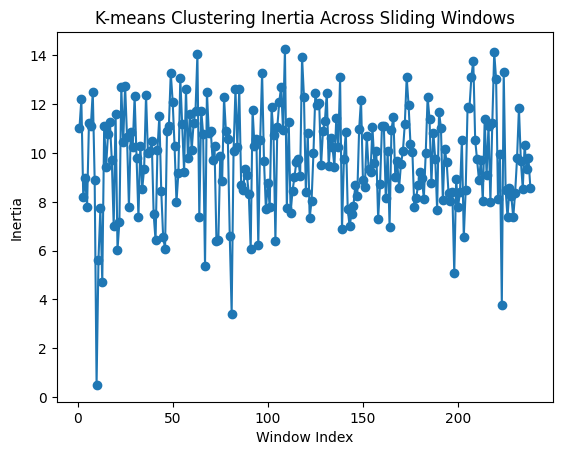

In [9]:
# Visualize inertia (clustering performance across sliding windows)
inertias = [result['inertia'] for result in cluster_results]
plt.plot(range(1, len(sliding_windows) + 1), inertias, marker='o')
plt.title("K-means Clustering Inertia Across Sliding Windows")
plt.xlabel("Window Index")
plt.ylabel("Inertia")
plt.show()

#### For Tumbling Window

In [10]:
# Analyzing Tumbling Window
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Parameters
window_size = 5
tumbling_windows = tumbling_window(df, window_size)

# Preprocess data (scaling for clustering)
scaler = StandardScaler()

# Perform clustering on each window
cluster_results = []
num_clusters = 3  # Number of clusters for k-means

for i, window in enumerate(tumbling_windows):
    # Scale the data
    scaled_data = scaler.fit_transform(window)

    # Apply K-means
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_data)

    # Store cluster labels and centroids
    cluster_results.append({
        "window_index": i,
        "labels": kmeans.labels_,
        "centroids": kmeans.cluster_centers_,
        "inertia": kmeans.inertia_  # Within-cluster sum of squares
    })

# Visualize clustering results
for result in cluster_results:
    print(f"Window {result['window_index'] + 1}:\nCluster Labels: {result['labels']}\n")
    print(f"Cluster Centroids:\n{result['centroids']}\n")
    print(f"Inertia (within-cluster sum of squares): {result['inertia']}\n")

Window 1:
Cluster Labels: [0 0 2 1 1]

Cluster Centroids:
[[-1.06066017  0.17327729 -0.35830761  0.77748158  0.98755222 -1.05616782
  -0.14995224]
 [ 1.06066017 -0.80140749  0.62367076 -0.08638684 -1.06909323  1.07275684
  -0.63487242]
 [ 0.          1.25626039 -0.53072631 -1.38218948  0.16308202 -0.03317805
   1.56964931]]

Inertia (within-cluster sum of squares): 11.014926327287412

Window 2:
Cluster Labels: [0 2 0 1 0]

Cluster Centroids:
[[ 0.         -0.4851892  -0.1484571   0.1787024  -0.77616851  0.56325739
  -0.38819537]
 [ 0.70710678 -0.4851892   1.00727759 -1.48647905  0.76664243 -1.4644692
   1.92931837]
 [-0.70710678  1.9407568  -0.56190629  0.95037185  1.5618631  -0.22530295
  -0.76473227]]

Inertia (within-cluster sum of squares): 11.945883676560488

Window 3:
Cluster Labels: [0 0 1 1 2]

Cluster Centroids:
[[-1.06066017 -0.58594357  0.421805   -0.97597057 -0.39827376  0.88640614
  -0.23319175]
 [ 0.35355339  0.77827619 -1.13558936  1.03793695 -0.59366903 -0.80729258
   0

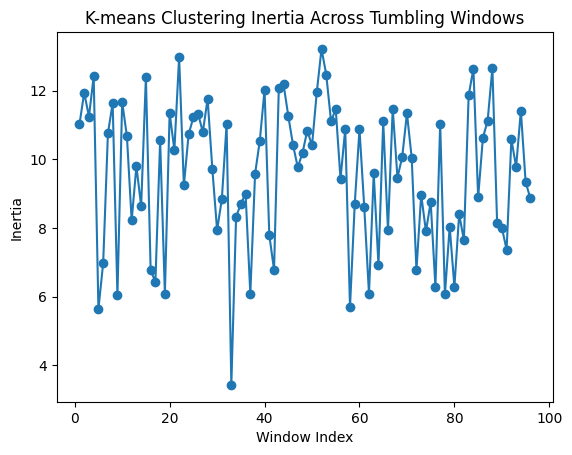

In [11]:
# Visualize inertia (clustering performance across tumbling windows)
inertias = [result['inertia'] for result in cluster_results]
plt.plot(range(1, len(tumbling_windows) + 1), inertias, marker='o')
plt.title("K-means Clustering Inertia Across Tumbling Windows")
plt.xlabel("Window Index")
plt.ylabel("Inertia")
plt.show()

## Visualization and Observations:
To analyze the effect of window size and windowing techniques on clustering performance, we will use clustering metrics like inertia (within-cluster sum of squares) and silhouette score. These metrics will help us evaluate how well the clustering algorithm groups the data for each window size and technique.

1. **Calculate Silhouette Score**: The silhouette score measures how similar an object is to its own cluster compared to other clusters. A higher score indicates better-defined clusters.
2. **Observations**: After running the code, we can observe the following:

**Effect of Window Size**:
- `Small window sizes`: The inertia tends to decrease as the window becomes smaller, as fewer data points result in clusters being tightly packed.
- `Larger window sizes`: Inertia increases because larger windows include more data points, leading to greater variance within clusters.

Silhouette scores for smaller windows may drop if clusters do not have enough data points for meaningful separation.

**Effect of Windowing Technique**:
- `Overlapping windows`: (sliding windows with small strides) often result in more consistent clustering, as the data points transition smoothly between windows.
Non-overlapping windows may lead to abrupt changes in clustering metrics, especially if there are strong variations between adjacent windows.
- `Silhouette Score`:A higher silhouette score indicates better clustering performance. You may notice that overlapping windows tend to have more stable silhouette scores compared to non-overlapping ones.

#### For Sliding Windows

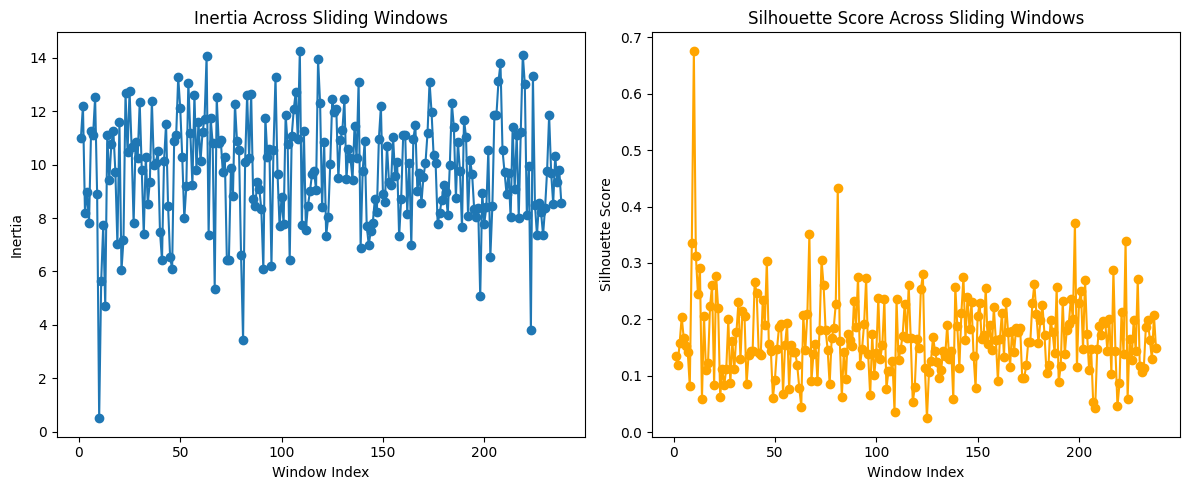

In [12]:
from sklearn.metrics import silhouette_score
import numpy as np

# Parameters
num_clusters = 3
silhouette_scores = []
inertias = []

# Perform clustering for different window sizes
for i, window in enumerate(sliding_windows):
    scaled_data = scaler.fit_transform(window)

    # Apply K-means
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_data)

    # Calculate inertia and silhouette score
    inertias.append(kmeans.inertia_)
    if len(window) > 1:  # Silhouette score requires at least 2 data points per cluster
        score = silhouette_score(scaled_data, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(np.nan)

# Plot inertia
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(sliding_windows) + 1), inertias, marker='o')
plt.title("Inertia Across Sliding Windows")
plt.xlabel("Window Index")
plt.ylabel("Inertia")

# Plot silhouette score
plt.subplot(1, 2, 2)
plt.plot(range(1, len(sliding_windows) + 1), silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Score Across Sliding Windows")
plt.xlabel("Window Index")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

#### For Tumbling Windows

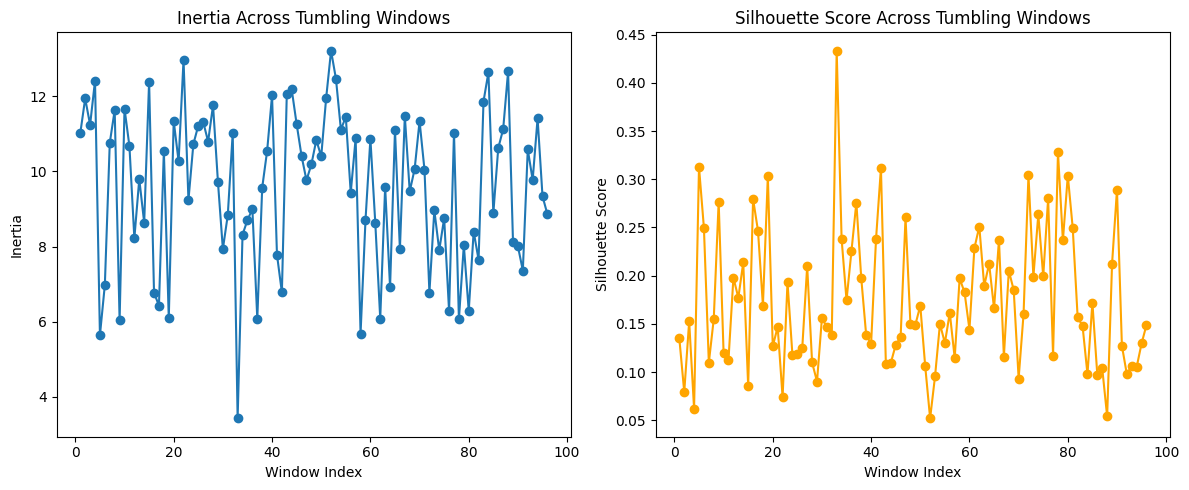

In [13]:
from sklearn.metrics import silhouette_score
import numpy as np

# Parameters
num_clusters = 3
silhouette_scores = []
inertias = []

# Perform clustering for different window sizes
for i, window in enumerate(tumbling_windows):
    scaled_data = scaler.fit_transform(window)

    # Apply K-means
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_data)

    # Calculate inertia and silhouette score
    inertias.append(kmeans.inertia_)
    if len(window) > 1:  # Silhouette score requires at least 2 data points per cluster
        score = silhouette_score(scaled_data, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(np.nan)

# Plot inertia
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(tumbling_windows) + 1), inertias, marker='o')
plt.title("Inertia Across Tumbling Windows")
plt.xlabel("Window Index")
plt.ylabel("Inertia")

# Plot silhouette score
plt.subplot(1, 2, 2)
plt.plot(range(1, len(tumbling_windows) + 1), silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Score Across Tumbling Windows")
plt.xlabel("Window Index")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()